# Lesson 6.04 Boosting

## What is Boosting?
Boosting is a Supervised Machine Learning ensemble algorithm for reducing bias and variance as well as to turn weak learners into strong learners.

## How is Boosting different from Bagging?

- **Bagging:** Training a bunch of individual models in a parallel way. Each model is trained by a random subset of the data
- **Boosting:** Training a bunch of individual models in a sequential way. Each individual model learns from mistakes made by the previous model.


## Boosting Techniques

### 1. AdaBoost

1. An additive model where shortcomings of previous models are identified by high-weight data points.
2. The trees are usually grown as decision stumps.
3. Each classifier has different weights assigned to the final prediction based on its performance.
4. It gives weights to both classifiers and observations thus capturing maximum variance within data.

### 2. Gradient Boosting

1. An additive model where shortcomings of previous models are identified by the gradient.
2. The trees are grown to a greater depth usually ranging from 8 to 32 terminal nodes.
3. All classifiers are weighed equally and their predictive capacity is restricted with learning rate to increase accuracy.
4. It builds trees on previous classifier’s residuals thus capturing variance in data.

## Import Libraries

In [1]:
# A simple toy dataset to visualize clustering and classification algorithms
from sklearn.datasets import make_moons

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

## Load Data

In [2]:
# Noise refers to degree of introducing correlated, redundant and uninformative features to the data 
X, y = make_moons(n_samples=10000, noise=.5, random_state=0)

## Train/Test Split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Fit a Decision Tree model as comparison

In [4]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.754

Feature: 0, Importance Score: 0.44983
Feature: 1, Importance Score: 0.55017


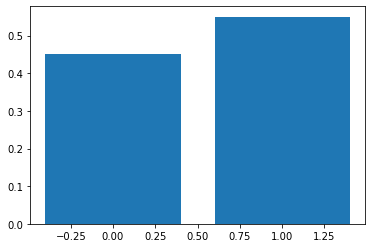

In [5]:
# get importance
importance = clf.feature_importances_

# summarise feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Importance Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Fit a Random Forest model

In [6]:
# n_estimators refer to the number of trees in the forest
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

# Compared to Decision Tree model, accuracy goes up by 5%

0.7965

Feature: 0, Importance Score: 0.46409
Feature: 1, Importance Score: 0.53591


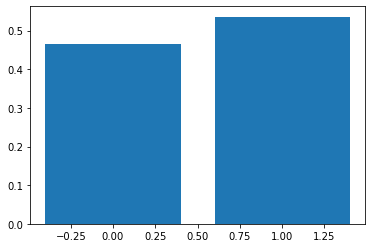

In [7]:
# get importance
importance = clf.feature_importances_

# summarise feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Importance Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Fit a AdaBoost model

In [8]:
# n_estimators refer to the maximum number of estimators at which boosting is terminated. 
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

# Compared to Decision Tree model, accuracy go up by 10%

0.833

Feature: 0, Importance Score: 0.45000
Feature: 1, Importance Score: 0.55000


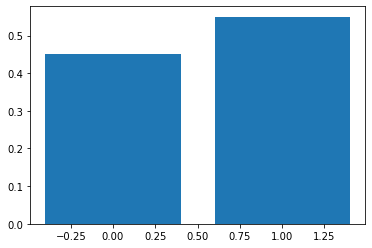

In [9]:
# get importance
importance = clf.feature_importances_

# summarise feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Importance Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Fit a Gradient Boosting model

In [10]:
# n_estimators refer to the number of boosting stages to perform
clf = GradientBoostingClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

# Compared to "Decision Tree model, accuracy go up by 10%

0.8335

Feature: 0, Importance Score: 0.41071
Feature: 1, Importance Score: 0.58929


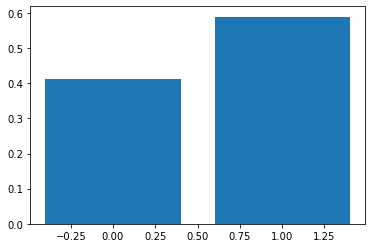

In [11]:
# get importance
importance = clf.feature_importances_

# summarise feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Importance Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()